In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/77.Roads-nature-pic.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/3.Ram-Country-Roads-US-FI-630x339.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/138.305d4c9b-92d5-48d8-a562-188442d31a47-large16x9_ThinkstockPhotos506008882.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/9.smooth-roads.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/119.concrete-plan-cement-to-replace-asphalt-on-29-city-roads.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/45.262321324.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/14.smooth-road.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/103.toll-roads-in-portugal.png
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/1.jpg
/kaggle/input/pothole-and-plain-rode-images/My Dataset/train/Plain/14.BmcZ12FCUAAfSPl.jpg
/kaggle

In [2]:
#import librarires

import kerastuner as kt
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16


In [3]:

#splitting  train test data 
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)


#train data with 224*224*3 size

train_data = train_datagen.flow_from_directory('../input/pothole-and-plain-rode-images/My Dataset/train',
                                                 target_size = (244, 244),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

test_datagen = ImageDataGenerator(rescale = 1/255,preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
test_data = test_datagen.flow_from_directory("../input/pothole-and-plain-rode-images/My Dataset/test",
                                                           batch_size=32,
                                                           target_size=(244,244),
                                                           class_mode='sparse',
                                                           shuffle=True,seed=1)


Found 723 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
class_names = ["plain","pothole"]
for i in range(len(class_names)):
    print(i," ",class_names[i])

0   plain
1   pothole


In [5]:
vgg_model =  VGG16(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
model = keras.Sequential()
for layer in vgg_model.layers:
  model.add(layer)
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()


553467904/553467096 [==============================] - 23s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
______________________________________________________

In [6]:
#compile the model

model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [7]:
#fit the model
history=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 20)

Epoch 1/20
16/23 [===================>..........] - ETA: 8s - loss: 2.1994 - accuracy: 0.5020

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


23/23 [==============================] - 31s 1s/step - loss: 1.8037 - accuracy: 0.5159 - val_loss: 0.6538 - val_accuracy: 0.5000
Epoch 2/20
23/23 [==============================] - 29s 1s/step - loss: 0.7142 - accuracy: 0.5892 - val_loss: 0.4765 - val_accuracy: 0.8125
Epoch 3/20
23/23 [==============================] - 29s 1s/step - loss: 0.4908 - accuracy: 0.7635 - val_loss: 0.3868 - val_accuracy: 0.8750
Epoch 4/20
23/23 [==============================] - 30s 1s/step - loss: 0.3420 - accuracy: 0.8340 - val_loss: 0.3541 - val_accuracy: 0.8750
Epoch 5/20
23/23 [==============================] - 29s 1s/step - loss: 0.3105 - accuracy: 0.8714 - val_loss: 0.4305 - val_accuracy: 0.8125
Epoch 6/20
23/23 [==============================] - 28s 1s/step - loss: 0.2192 - accuracy: 0.9281 - val_loss: 0.4463 - val_accuracy: 0.8750
Epoch 7/20
23/23 [==============================] - 28s 1s/step - loss: 0.2235 - accuracy: 0.9212 - val_loss: 0.6098 - val_accuracy: 0.8125
Epoch 8/20
23/23 [=============

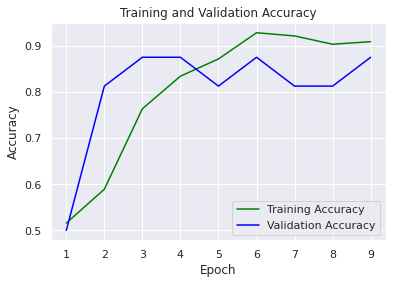

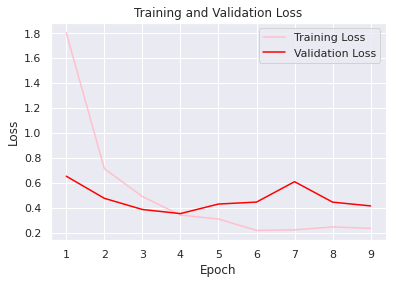

In [8]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

[0]
plain


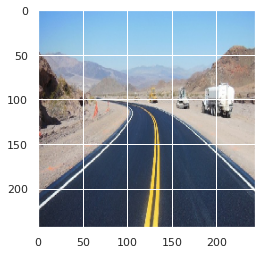

In [9]:
#test_eaxmple1
from keras.preprocessing import image
import numpy as np
image_path = "../input/pothole-and-plain-rode-images/My Dataset/train/Plain/1.smooth_road_resize_md.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


[1]
pothole


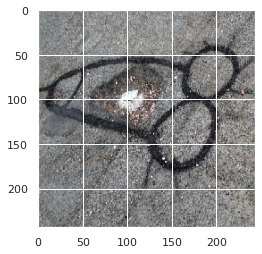

In [10]:
#test_eaxmple2
from keras.preprocessing import image
import numpy as np
image_path = "../input/pothole-and-plain-rode-images/My Dataset/train/Pothole/10._106607865_65893a7f-c27f-4be9-96cd-56f709475d40.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)


[0]
plain


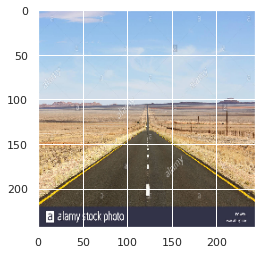

In [11]:
#test_eaxmple3
from keras.preprocessing import image
import numpy as np
image_path = "../input/pothole-and-plain-rode-images/My Dataset/train/Plain/11.long-stretch-of-straight-blacktop-highway-through-the-namibian-desert-in-africa-PG48W1.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [12]:
#evaluate model
model.evaluate(test_data)

1/1 [==============================] - 0s 20ms/step - loss: 0.4155 - accuracy: 0.8750


[0.4154953360557556, 0.875]

In [13]:
#predict model 
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1]


In [14]:
#save file as h5 model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save("model_road_.h5")